<a href="https://colab.research.google.com/github/MinhQuang31751/Python/blob/main/ratings_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**4.BỘ DỮ LIỆU CỦA RATINGS**

**Định nghĩa vấn đề**

**a) Mô tả**

**Đặc điểm:** Dữ liệu phản hồi rõ ràng, trong đó người dùng chủ động cung cấp một điểm số cụ thể (0.5 đến 5 sao). Nó cũng chứa dữ liệu chuỗi thời gian, cho biết chính xác thời điểm một rating được đưa ra.

**b) Dữ liệu vào**

- Bảng đánh giá (Ratings DataFrame):

  - userId: ID của người dùng (Int64)

  - movieId: ID duy nhất của phim (Int64)

  - rating: Điểm đánh giá do người dùng cung cấp( 0.5-5.0)

  - timestamp: Dấu thời gian

**c) Dữ liệu ra (Kết quả phân tích)**

**Các insight về hành vi và sở thích:**

- Phân tích xu hướng.

- Hiểu hành vi người dùng.

- Mối quan hệ giữa thể loại và điểm số.

##**4.1.Tiền xử lý dữ liệu**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/PTDL_PY/Bản sao của ratings.csv')
display(df)

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
...,...,...,...,...
32000199,200948,79702,4.5,1294412589
32000200,200948,79796,1.0,1287216292
32000201,200948,80350,0.5,1294412671
32000202,200948,80463,3.5,1350423800


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

###**4.1.1.Đánh giá tổng quan dữ liệu**

In [ ]:
print("=" * 60)
print("BƯỚC 1: KHẢO SÁT DỮ LIỆU BAN ĐẦU")
print("=" * 60)

print(f"Kích thước dữ liệu: {df.shape}")
print(f"\nThông tin các cột:")
print(df.info())
print(f"\n5 dòng đầu tiên:")
print(df.head())
print(f"\nThống kê mô tả:")
print(df.describe())

BƯỚC 1: KHẢO SÁT DỮ LIỆU BAN ĐẦU
Kích thước dữ liệu: (32000204, 4)

Thông tin các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None

5 dòng đầu tiên:
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858

Thống kê mô tả:
             userId       movieId        rating     timestamp
count  3.200020e+07  3.200020e+07  3.200020e+07  3.200020e+07
mean   1.002785e+05  2.931861e+04  3.540396e+00  1.275241e+09
std    5.794905e+04  5.095816e+04  1.058986e+00  2.561630e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    5.005300e+04  1.23

###**4.1.2.KIỂM TRA GIÁ TRỊ THIẾU**

In [ ]:
print("\n" + "=" * 60)
print("BƯỚC 2: KIỂM TRA GIÁ TRỊ THIẾU")
print("=" * 60)

missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Số lượng thiếu': missing_data,
    'Tỷ lệ thiếu (%)': missing_percent
})
print(missing_info)



BƯỚC 2: KIỂM TRA GIÁ TRỊ THIẾU
           Số lượng thiếu  Tỷ lệ thiếu (%)
userId                  0              0.0
movieId                 0              0.0
rating                  0              0.0
timestamp               0              0.0


**Đánh giá:**
- Không có giá trị nào bị thiếu

###**4.1.3.KIỂM TRA GIÁ TRỊ TRÙNG LẶP**

In [ ]:

print("=" * 60)

# Kiểm tra trùng lặp hoàn toàn
duplicates = df.duplicated().sum()
print(f"Số bản ghi trùng lặp hoàn toàn: {duplicates}")

# Kiểm tra trùng lặp theo user-movie (1 user chỉ nên rating 1 movie 1 lần)
user_movie_duplicates = df.duplicated(subset=['userId', 'movieId']).sum()
print(f"Số bản ghi trùng lặp userId-movieId: {user_movie_duplicates}")

if user_movie_duplicates > 0:
    print("\nCác bản ghi trùng lặp userId-movieId:")
    duplicates_df = df[df.duplicated(subset=['userId', 'movieId'], keep=False)]
    print(duplicates_df.sort_values(['userId', 'movieId']))


Số bản ghi trùng lặp hoàn toàn: 0
Số bản ghi trùng lặp userId-movieId: 0


**Đánh giá**
- Số bản ghi trùng lặp hoàn toàn: 0
- Số bản ghi trùng lặp userId-movieId: 0

###**4.1.4.Chuyển đổi cột timestamp sang datetime**

**Cần chuyển đổi timestamp sang  datetime vì timestamp (ví dụ: 944249077) là một con số chỉ máy tính mới hiểu , còn datetime  (ví dụ: 1999-11-28 14:17:57) là định dạng mà con người và các công cụ phân tích có thể đọc và sử dụng được.**

In [ ]:
import pandas as pd
from datetime import datetime

# Chuyển đổi timestamp sang datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Trích xuất các thành phần thời gian
df['date'] = df['datetime'].dt.date
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

# Hiển thị 5 dòng đầu tiên với các cột thời gian đã chuyển đổi
print("DỮ LIỆU SAU KHI CHUYỂN ĐỔI TIMESTAMP:")
print("=" * 80)
print(df[['userId', 'movieId', 'rating', 'timestamp', 'datetime', 'date', 'year', 'month', 'day', 'hour', 'day_of_week']].head())

# Hiển thị chi tiết chuyển đổi
print("\n" + "=" * 80)
print("CHI TIẾT CHUYỂN ĐỔI TIMESTAMP:")
print("=" * 80)
for i, row in df.head().iterrows():
    normal_date = datetime.fromtimestamp(row['timestamp'])
    print(f"• Timestamp {row['timestamp']} → {normal_date} ({row['day_of_week']})")

# Thống kê phạm vi thời gian
print("\n" + "=" * 80)
print("THỐNG KÊ PHẠM VI THỜI GIAN:")
print("=" * 80)
print(f"• Thời gian sớm nhất: {df['datetime'].min()}")
print(f"• Thời gian muộn nhất: {df['datetime'].max()}")
print(f"• Khoảng thời gian: {df['datetime'].max() - df['datetime'].min()}")
print(f"• Số năm trong dữ liệu: {df['year'].nunique()}")
print(f"• Các năm: {sorted(df['year'].unique())}")

DỮ LIỆU SAU KHI CHUYỂN ĐỔI TIMESTAMP:
   userId  movieId  rating  timestamp            datetime        date  year  \
0       1       17     4.0  944249077 1999-12-03 19:24:37  1999-12-03  1999   
1       1       25     1.0  944250228 1999-12-03 19:43:48  1999-12-03  1999   
2       1       29     2.0  943230976 1999-11-22 00:36:16  1999-11-22  1999   
3       1       30     5.0  944249077 1999-12-03 19:24:37  1999-12-03  1999   
4       1       32     5.0  943228858 1999-11-22 00:00:58  1999-11-22  1999   

   month  day  hour day_of_week  
0     12    3    19      Friday  
1     12    3    19      Friday  
2     11   22     0      Monday  
3     12    3    19      Friday  
4     11   22     0      Monday  

CHI TIẾT CHUYỂN ĐỔI TIMESTAMP:
• Timestamp 944249077 → 1999-12-03 19:24:37 (Friday)
• Timestamp 944250228 → 1999-12-03 19:43:48 (Friday)
• Timestamp 943230976 → 1999-11-22 00:36:16 (Monday)
• Timestamp 944249077 → 1999-12-03 19:24:37 (Friday)
• Timestamp 943228858 → 1999-11-22 00:0

**INSIGHT RÚT RA KHI CHUYỂN ĐỔI DỮ LIỆU TIMESTAMP SANG DATETIME**

**QUY MÔ THỜI GIAN:**

- Kéo dài 28 năm (1995-2023) - dataset rất giá trị

- 10,503 ngày ≈ 28.8 năm coverage

- Dữ liệu trải dài qua 3 thập kỷ

**Ý NGHĨA PHÂN TÍCH:**

**ƯU ĐIỂM:**

- Xu hướng dài hạn - Có thể phân tích biến đổi văn hóa, công nghệ

- Dữ liệu lịch sử - Ghi lại sự phát triển của ngành điện ảnh

- Multiple generations - Trải nghiệm của nhiều thế hệ user

**CƠ HỘI PHÂN TÍCH:**

- Xu hướng rating theo thập kỷ (90s, 2000s, 2010s, 2020s)

- Ảnh hưởng của streaming services (Netflix, YouTube, etc.)

- Thay đổi hành vi user qua các thời kỳ

- Tác động của sự kiện (COVID-19, kinh tế, công nghệ)

### **4.1.5.Bảng dữ liệu sau khi chuyển đổi cột timestamp sang ngày, giờ, tháng, năm.**

In [ ]:
display(df)

,userId,movieId,rating,timestamp,datetime,date,year,month,day,hour,day_of_week
0,1,17,4.0,944249077,1999-12-03 19:24:37,1999-12-03,1999,12,3,19,Friday
1,1,25,1.0,944250228,1999-12-03 19:43:48,1999-12-03,1999,12,3,19,Friday
2,1,29,2.0,943230976,1999-11-22 00:36:16,1999-11-22,1999,11,22,0,Monday
3,1,30,5.0,944249077,1999-12-03 19:24:37,1999-12-03,1999,12,3,19,Friday
4,1,32,5.0,943228858,1999-11-22 00:00:58,1999-11-22,1999,11,22,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...
32000199,200948,79702,4.5,1294412589,2011-01-07 15:03:09,2011-01-07,2011,1,7,15,Friday
32000200,200948,79796,1.0,1287216292,2010-10-16 08:04:52,2010-10-16,2010,10,16,8,Saturday
32000201,200948,80350,0.5,1294412671,2011-01-07 15:04:31,2011-01-07,2011,1,7,15,Friday
32000202,200948,80463,3.5,1350423800,2012-10-16 21:43:20,2012-10-16,2012,10,16,21,Tuesday


**Kết quả:** bộ dữ liệu có kích thước 32,000,204 hàng và 11 cột.

##**4.2.EDA Và Trực Quan Hóa Dữ Liệu**

###**4.2.1.PHÂN TÍCH ĐƠN BIẾN**

####**4.2.1.1. Phân phối rating**

**Câu hỏi: "Phân phối điểm rating từ 1-5 sao như thế nào? Xu hướng đánh giá của người dùng thiên về điểm cao hay điểm thấp?"**

**Mục tiêu:**

- Hiểu được xu hướng đánh giá tổng thể

- Xác định xem người dùng có tích cực trong đánh giá không

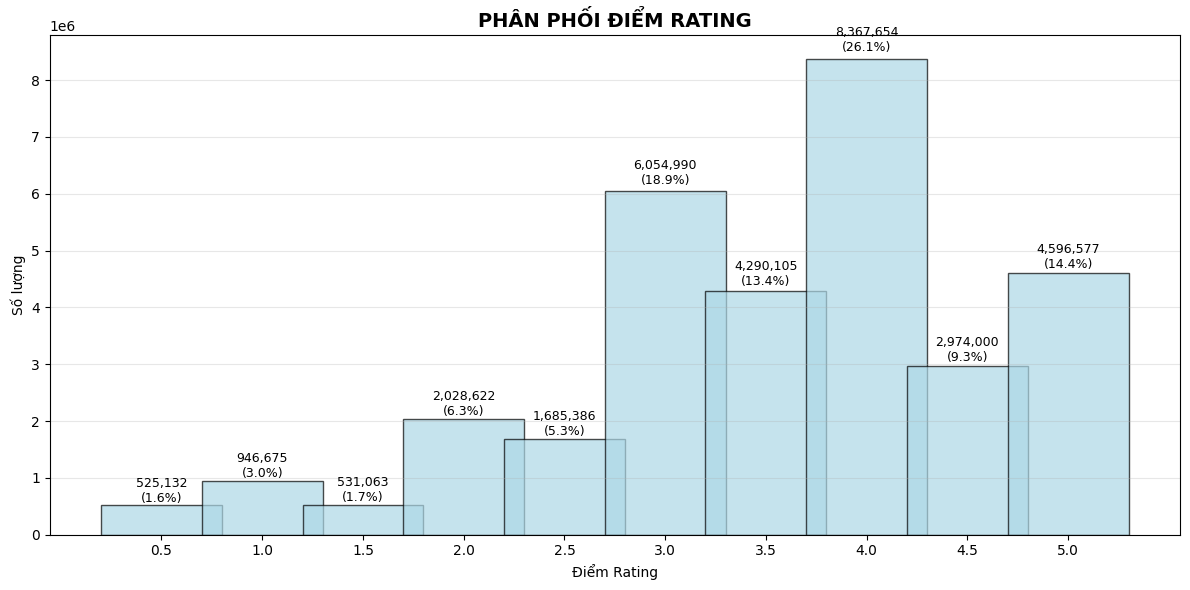

THỐNG KÊ PHÂN PHỐI RATING:
Rating 0.5: 525,132 lượt (1.6%)
Rating 1.0: 946,675 lượt (3.0%)
Rating 1.5: 531,063 lượt (1.7%)
Rating 2.0: 2,028,622 lượt (6.3%)
Rating 2.5: 1,685,386 lượt (5.3%)
Rating 3.0: 6,054,990 lượt (18.9%)
Rating 3.5: 4,290,105 lượt (13.4%)
Rating 4.0: 8,367,654 lượt (26.1%)
Rating 4.5: 2,974,000 lượt (9.3%)
Rating 5.0: 4,596,577 lượt (14.4%)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sửa lỗi font chữ
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# Phân phối rating
rating_counts = df['rating'].value_counts().sort_index()

# Tạo biểu đồ cột với khoảng cách giữa các cột
plt.figure(figsize=(12, 6))
bars = plt.bar(rating_counts.index, rating_counts.values,
               width=0.6,  # Giảm độ rộng cột
               color='lightblue', edgecolor='black', alpha=0.7)

plt.title('PHÂN PHỐI ĐIỂM RATING', fontsize=14, fontweight='bold')
plt.xlabel('Điểm Rating')
plt.ylabel('Số lượng')
plt.grid(axis='y', alpha=0.3)

# Điều chỉnh trục x để có khoảng cách giữa các cột
plt.xticks(rating_counts.index)

# Thêm giá trị trên các cột
for bar, count in zip(bars, rating_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (height * 0.01),
            f'{count:,}\n({count/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Hiển thị thống kê
print("THỐNG KÊ PHÂN PHỐI RATING:")
for rating, count in rating_counts.items():
    print(f"Rating {rating}: {count:,} lượt ({count/len(df)*100:.1f}%)")

ĐÁNH GIÁ PHÂN PHỐI RATING:

**XU HƯỚNG TÍCH CỰC:**

- 50% rating từ 4.0 sao trở lên

- Rating 4.0 sao chiếm cao nhất (26.1%)

- Rating tích cực (4.0-5.0) chiếm 49.8%


**NHẬN XÉT:**

- Người dùng có xu hướng rating khá tích cực

- Rating trung bình (~3.5-4.0) khá cao

- Có sự chênh lệch rõ giữa rating cao (4.0) và thấp (1.0-2.0)

**KẾT LUẬN:** Dữ liệu cho thấy người dùng hài lòng với các bộ phim và có xu hướng đánh giá tích cực.

####**4.2.1.2. Phân bố mức độ hữu ích**

**Câu hỏi: "Phân bố của cột 'useful' như thế nào? Đa số rating có được đánh giá là hữu ích hay không?"**

**Mục tiêu:**

- Đánh giá chất lượng các rating

- Hiểu được giá trị trung bình của độ hữu ích

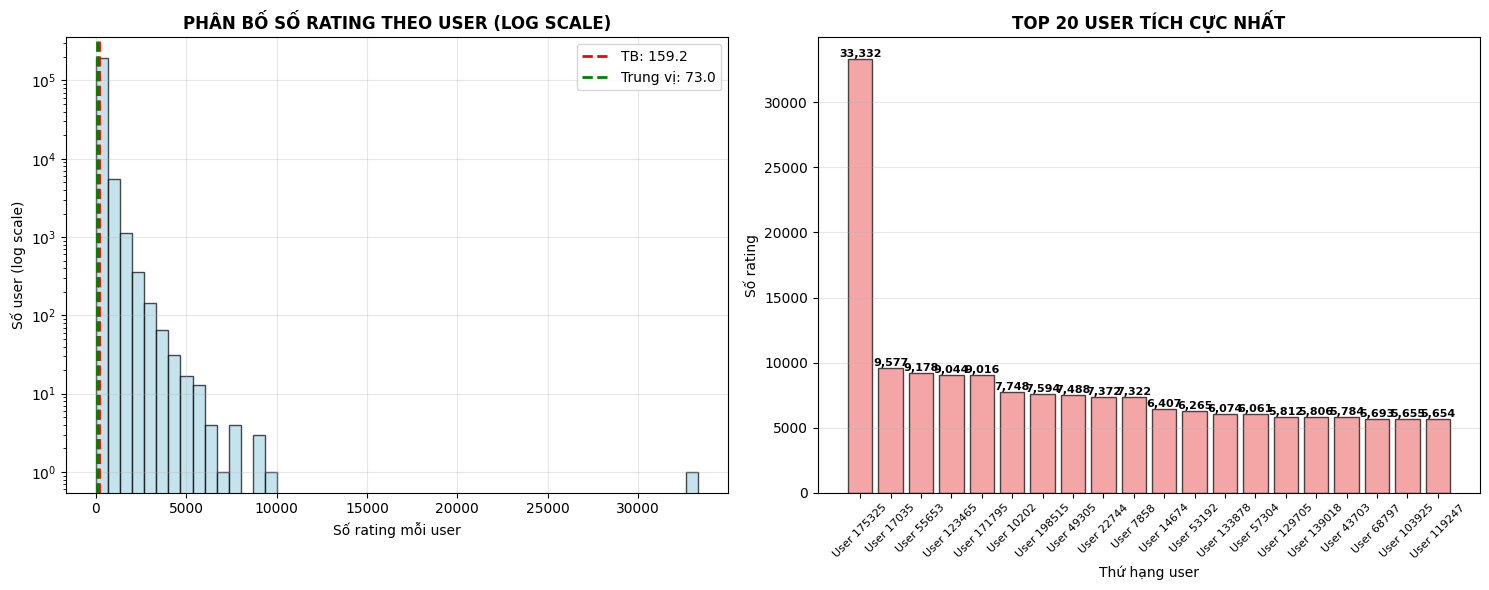

THỐNG KÊ CHI TIẾT PHÂN BỐ RATING THEO USER
📊 Tổng số rating: 32,000,204
👥 Số user duy nhất: 200,948
📈 Số rating trung bình mỗi user: 159.2
📉 Số rating trung vị mỗi user: 73.0
🔥 User nhiều rating nhất: 33,332 rating
❄️ User ít rating nhất: 20 rating
📏 Độ lệch chuẩn: 282.0

📋 PHÂN TÍCH PHÂN PHỐI:
• 25% user có dưới 36 rating
• 50% user có dưới 73 rating
• 75% user có dưới 167 rating

🏆 TOP 5 USER TÍCH CỰC NHẤT:
1. User 175325: 33,332 rating (0.10% tổng rating)
2. User 17035: 9,577 rating (0.03% tổng rating)
3. User 55653: 9,178 rating (0.03% tổng rating)
4. User 123465: 9,044 rating (0.03% tổng rating)
5. User 171795: 9,016 rating (0.03% tổng rating)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sửa lỗi font chữ
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# Đếm số rating của mỗi user
user_rating_counts = df['userId'].value_counts()

# Tạo biểu đồ với 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ 1: Histogram với bins nhỏ hơn và log scale
ax1.hist(user_rating_counts.values, bins=50, color='lightblue',
         alpha=0.7, edgecolor='black', log=True)
ax1.set_title('PHÂN BỐ SỐ RATING THEO USER (LOG SCALE)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Số rating mỗi user')
ax1.set_ylabel('Số user (log scale)')
ax1.grid(alpha=0.3)

# Thêm đường trung bình và trung vị
mean_ratings = user_rating_counts.mean()
median_ratings = user_rating_counts.median()
ax1.axvline(mean_ratings, color='red', linestyle='--', linewidth=2, label=f'TB: {mean_ratings:.1f}')
ax1.axvline(median_ratings, color='green', linestyle='--', linewidth=2, label=f'Trung vị: {median_ratings:.1f}')
ax1.legend()

# Biểu đồ 2: Top 20 user tích cực nhất
top_20_users = user_rating_counts.head(20)
bars = ax2.bar(range(len(top_20_users)), top_20_users.values,
               color='lightcoral', alpha=0.7, edgecolor='black')
ax2.set_title('TOP 20 USER TÍCH CỰC NHẤT', fontsize=12, fontweight='bold')
ax2.set_xlabel('Thứ hạng user')
ax2.set_ylabel('Số rating')
ax2.set_xticks(range(len(top_20_users)))
ax2.set_xticklabels([f'User {i}' for i in top_20_users.index], rotation=45, fontsize=8)
ax2.grid(axis='y', alpha=0.3)

# Thêm số trên các cột
for bar, count in zip(bars, top_20_users.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 5, f'{count:,}',
             ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()
# Hiển thị thống kê chi tiết
print("=" * 60)
print("THỐNG KÊ CHI TIẾT PHÂN BỐ RATING THEO USER")
print("=" * 60)
print(f"📊 Tổng số rating: {len(df):,}")
print(f"👥 Số user duy nhất: {df['userId'].nunique():,}")
print(f"📈 Số rating trung bình mỗi user: {mean_ratings:.1f}")
print(f"📉 Số rating trung vị mỗi user: {median_ratings:.1f}")
print(f"🔥 User nhiều rating nhất: {user_rating_counts.max():,} rating")
print(f"❄️ User ít rating nhất: {user_rating_counts.min():,} rating")
print(f"📏 Độ lệch chuẩn: {user_rating_counts.std():.1f}")

# Phân tích phần trăm
print(f"\n📋 PHÂN TÍCH PHÂN PHỐI:")
q25 = user_rating_counts.quantile(0.25)
q75 = user_rating_counts.quantile(0.75)
print(f"• 25% user có dưới {q25:.0f} rating")
print(f"• 50% user có dưới {median_ratings:.0f} rating")
print(f"• 75% user có dưới {q75:.0f} rating")

# Top 5 user
print(f"\n🏆 TOP 5 USER TÍCH CỰC NHẤT:")
top_5_users = user_rating_counts.head()
for i, (user_id, count) in enumerate(top_5_users.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i}. User {user_id}: {count:,} rating ({percentage:.2f}% tổng rating)")

###**4.2.2.PHÂN TÍCH ĐA BIẾN**

####**4.2.2.1.Xu hướng số lượng rating theo năm**

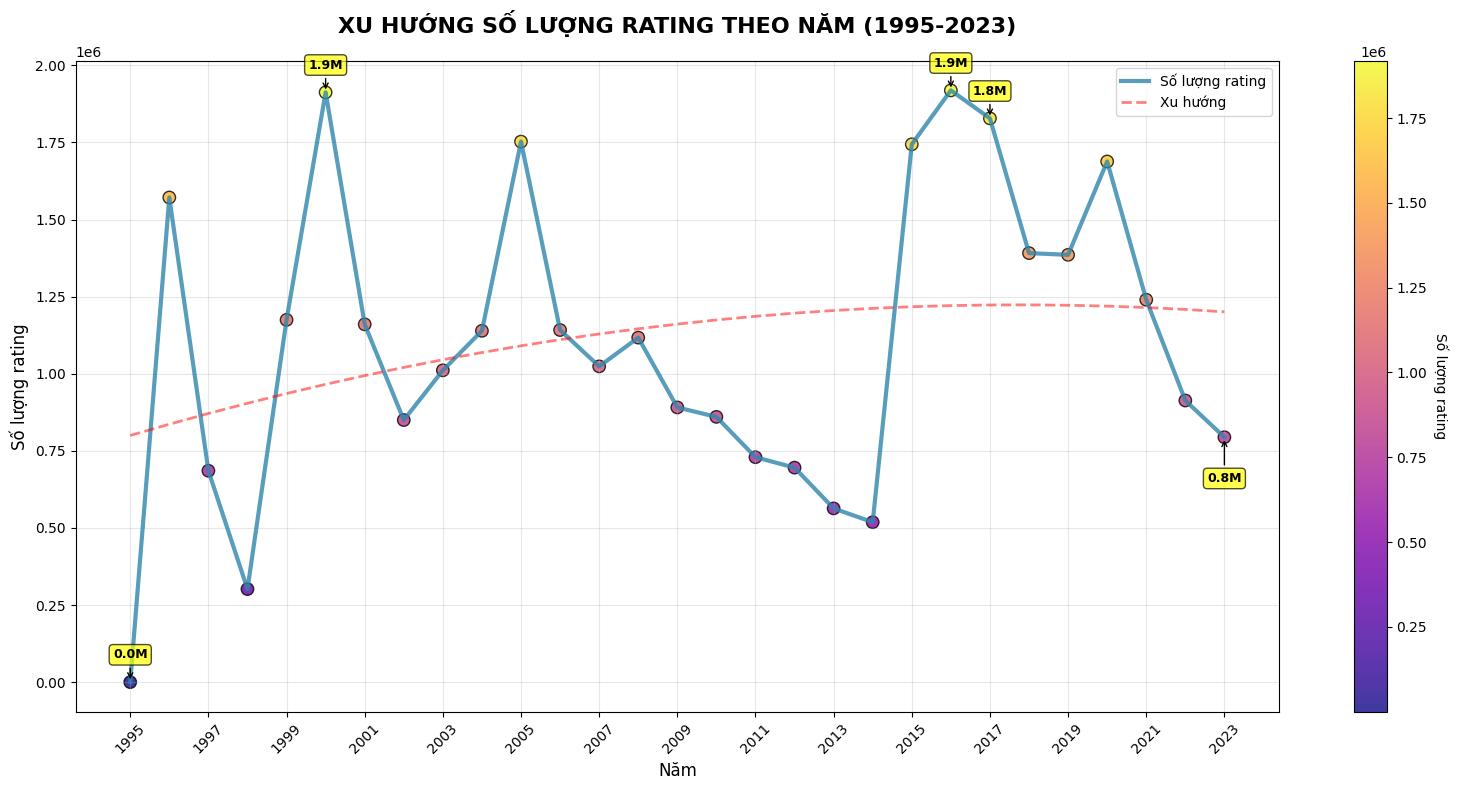

In [ ]:

# Tính toán số lượng rating theo từng năm
yearly_stats = df.groupby('year').agg({
    'rating': 'count',
    'userId': 'nunique',
    'movieId': 'nunique'
}).round(3)
yearly_stats.columns = ['rating_count', 'unique_users', 'unique_movies']
yearly_stats = yearly_stats.reset_index()

# Tạo biểu đồ đường cho số lượng rating theo năm
plt.figure(figsize=(16, 8))

# Biểu đồ đường số lượng rating theo năm với gradient màu
# Tạo gradient màu từ xanh dương đến đỏ
colors = plt.cm.viridis(np.linspace(0, 1, len(yearly_stats)))

# Vẽ đường chính
line = plt.plot(yearly_stats['year'], yearly_stats['rating_count'],
                linewidth=3, color='#2E86AB', alpha=0.8, label='Số lượng rating')

# Thêm điểm đánh dấu với gradient màu
scatter = plt.scatter(yearly_stats['year'], yearly_stats['rating_count'],
                     c=yearly_stats['rating_count'], cmap='plasma',
                     s=80, alpha=0.8, edgecolors='black', linewidth=1)

plt.title('XU HƯỚNG SỐ LƯỢNG RATING THEO NĂM (1995-2023)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Số lượng rating', fontsize=12)
plt.grid(alpha=0.3)

# Thêm giá trị trên các điểm quan trọng (năm đầu, cuối, và các năm đỉnh)
important_years = [yearly_stats['year'].min(), yearly_stats['year'].max()]
peak_years = yearly_stats.nlargest(3, 'rating_count')['year'].tolist()
important_years.extend(peak_years)
important_years = list(set(important_years))

for year in important_years:
    if year in yearly_stats['year'].values:
        count = yearly_stats[yearly_stats['year'] == year]['rating_count'].iloc[0]
        plt.annotate(f'{count/1000000:.1f}M',
                    xy=(year, count),
                    xytext=(0, 15 if year != yearly_stats['year'].max() else -25),
                    textcoords='offset points',
                    ha='center', va='bottom' if year != yearly_stats['year'].max() else 'top',
                    fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Thêm colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Số lượng rating', rotation=270, labelpad=15)

# Tùy chỉnh trục x
plt.xticks(yearly_stats['year'][::2], rotation=45)  # Hiển thị 2 năm một

# Thêm trendline
z = np.polyfit(yearly_stats['year'], yearly_stats['rating_count'], 2)
p = np.poly1d(z)
plt.plot(yearly_stats['year'], p(yearly_stats['year']), "--",
         color='red', alpha=0.5, linewidth=2, label='Xu hướng')

plt.legend()
plt.tight_layout()
plt.show()

**Insight rút ra**

- Có thể đây là bộ dữ liệu MovieLens, một trong những bộ dữ liệu nổi tiếng nhất thế giới dùng để nghiên cứu và xây dựng hệ thống gợi ý phim Nó được tạo ra bởi phòng nghiên cứu GroupLens tại Đại học Minnesota.

  - Điều này có nghĩa là biểu đồ xu hướng không phản ánh hành vi rating phim của toàn thế giới. Thay vào đó, nó phản ánh lịch sử thu thập dữ liệu của dự án MovieLens.

- Các "sự kiện" gây ra đỉnh và đáy chính là các phiên bản (versions) khác nhau của bộ dữ liệu này được phát hành.
  - Các đỉnh 1.9M (2016) và 1.8M (2017) trên biểu đồ chính là thời điểm mà đợt thu thập dữ liệu khổng lồ này kết thúc và được công bố. Đây là những năm có hoạt động thu thập sôi nổi nhất để hoàn thành bộ dữ liệu

- 2005-2014: dần giảm có thể là lúc kết thúc chiến dịch: Nhóm nghiên cứu GroupLens đã đạt được mục tiêu (ví dụ: thu thập đủ 10 triệu rating). Họ không cần phải tiếp tục đẩy mạnh các hoạt động thu thập nữa.

####**4.2.2.2.Xu hương rating theo thời gian**

**Câu hỏi: Mọi người thường rating phim vào lúc nào? Cuối tuần hay trong tuần?**

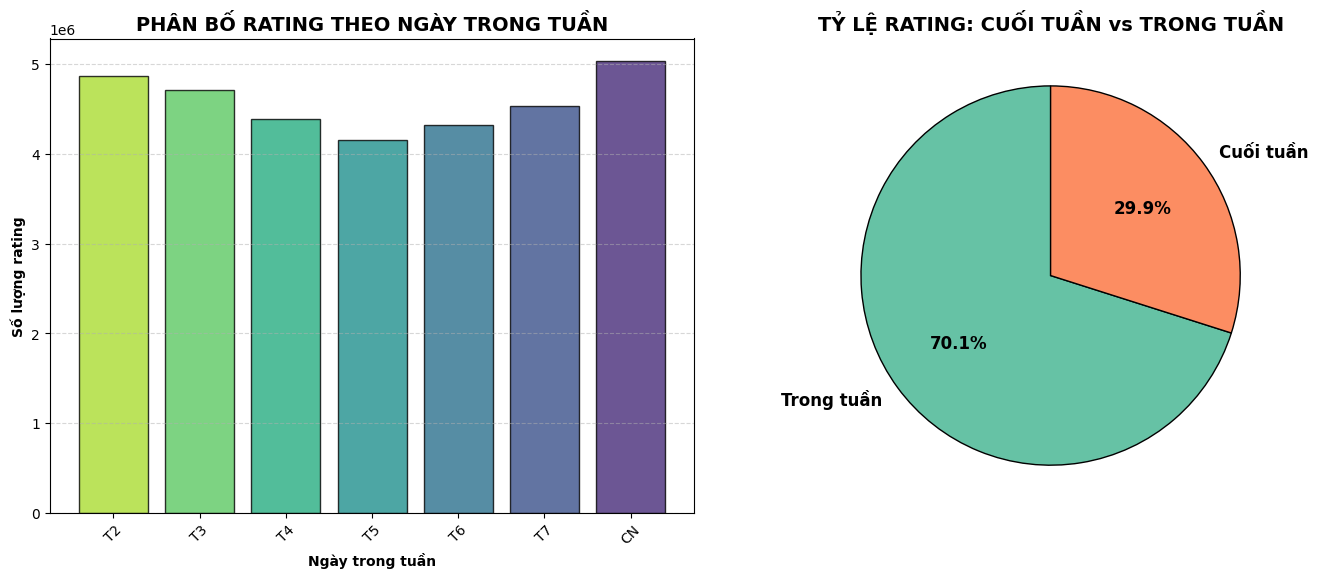

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df['day_of_week'] = df['datetime'].dt.day_name()
df['is_weekend'] = df['datetime'].dt.dayofweek >= 5  # Thứ 7 (5), CN (6)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6)) # (Ngang, Cao)

# === 3. BIỂU ĐỒ 1: PHÂN BỐ RATING THEO NGÀY TRONG TUẦN ===
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = df['day_of_week'].value_counts().reindex(day_order)

# Tạo palette 7 màu gradient đẹp mắt
colors_days = sns.color_palette("viridis_r", 7)

ax1.bar(range(len(daily_counts)), daily_counts.values,
        color=colors_days, edgecolor='black', alpha=0.8)
ax1.set_title('PHÂN BỐ RATING THEO NGÀY TRONG TUẦN', fontsize=14, fontweight='bold')
ax1.set_xlabel('Ngày trong tuần', fontweight='bold')
ax1.set_ylabel('Số lượng rating', fontweight='bold')
ax1.set_xticks(range(len(daily_counts)))
ax1.set_xticklabels(['T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'CN'], rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# === 4. BIỂU ĐỒ 2: TỶ LỆ RATING: CUỐI TUẦN vs TRONG TUẦN ===

# Dùng sort_index() để đảm bảo False (Trong tuần) luôn đứng trước True (Cuối tuần)
weekend_counts = df['is_weekend'].value_counts().sort_index()
labels_pie = ['Trong tuần', 'Cuối tuần']

# Dùng palette màu "Set2" của Seaborn
colors_pie = sns.color_palette("Set2", 2)

ax2.pie(weekend_counts.values, labels=labels_pie, autopct='%1.1f%%',
        colors=colors_pie, startangle=90,
        wedgeprops={'edgecolor': 'black'}, # Thêm viền cho rõ
        textprops={'fontsize': 12, 'fontweight': 'bold'}) # Tăng cỡ chữ
ax2.set_title('TỶ LỆ RATING: CUỐI TUẦN vs TRONG TUẦN', fontsize=14, fontweight='bold')

# === 5. HIỂN THỊ ===
plt.tight_layout() # Tự động căn chỉnh
plt.show()

**Kết Luận**
- Ngày Chủ Nhật là ngày "vàng" của hoạt động rating: Nhìn vào biểu đồ cột, Chủ Nhật (CN) là ngày có số lượng rating cao nhất trong tuần, vượt mốc 5 triệu.

**Hai biểu đồ này tưởng chừng mâu thuẫn nhưng thực ra lại bổ trợ cho nhau:**

- Biểu đồ tròn (bên phải) cho thấy tổng khối lượng (volume) rating trong 5 ngày làm việc là lớn hơn.

- Biểu đồ cột (bên trái) cho thấy mức độ hoạt động trung bình mỗi ngày của cuối tuần (đặc biệt là Chủ Nhật) lại cao hơn bất kỳ ngày nào trong tuần.

####**4.2.2.3.Top 10 phim yêu thích nhất**

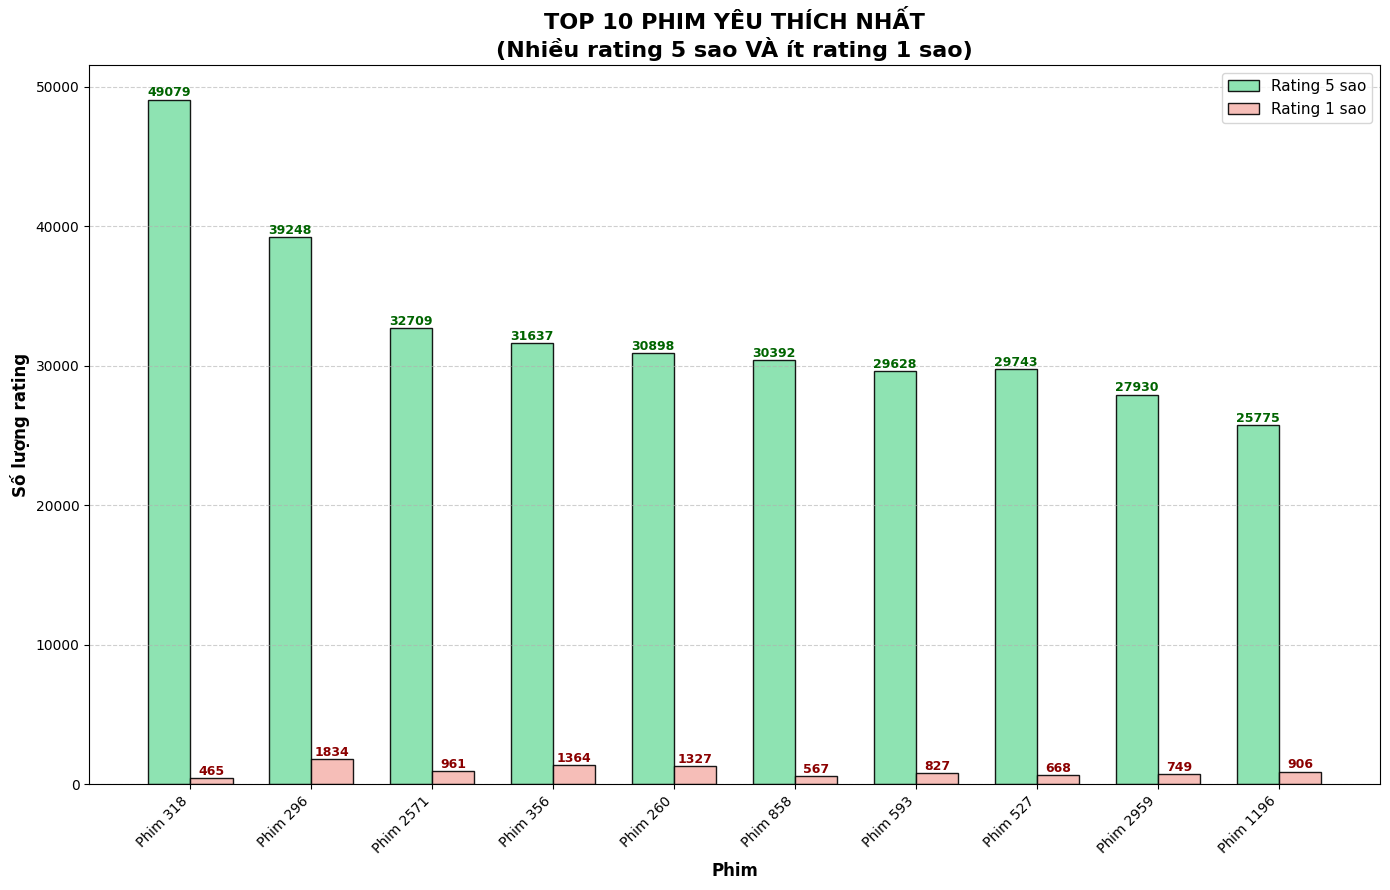

In [ ]:
movie_controversial = df.groupby('movieId').agg({
    'rating': ['count',
               lambda x: (x == 5).sum(),  # Số rating 5 sao
               lambda x: (x == 1).sum()]  # Số rating 1 sao
}).round(3)

movie_controversial.columns = ['total_ratings', 'five_star', 'one_star']
movie_controversial = movie_controversial.reset_index()

# Tính tỷ lệ rating 5 sao và 1 sao
movie_controversial['five_star_ratio'] = movie_controversial['five_star'] / movie_controversial['total_ratings']
movie_controversial['one_star_ratio'] = movie_controversial['one_star'] / movie_controversial['total_ratings']

# Lọc các phim có ít nhất 100 rating và có cả rating 5 sao lẫn 1 sao
controversial_movies = movie_controversial[
    (movie_controversial['total_ratings'] >= 100) &
    (movie_controversial['five_star'] >= 10) &
    (movie_controversial['one_star'] >= 10)].copy()

# Tính điểm "gây tranh cãi" (tổng số rating 5 sao và 1 sao)
controversial_movies = controversial_movies.assign(
    controversy_score=controversial_movies['five_star'] + controversial_movies['one_star'])

# Sắp xếp theo điểm gây tranh cãi
top_controversial = controversial_movies.nlargest(10, 'controversy_score')

# Tạo biểu đồ
plt.figure(figsize=(14, 9)) # Tăng kích thước biểu đồ một chút để dễ nhìn

# Vẽ biểu đồ cột kép
x = np.arange(len(top_controversial)) # Sử dụng np.arange
width = 0.35

# Sửa màu thành xanh nhạt hơn
# Màu xanh lá cây nhạt cho 5 sao
color_five_star = '#82E0AA' # Light Greenish Blue
# Màu xanh dương nhạt hơn cho 1 sao (hoặc có thể là màu đỏ nhạt hơn để giữ sự đối lập)
color_one_star = '#F5B7B1' # Light Coral (để vẫn có sự đối lập nhẹ)

# Nếu muốn cả hai đều xanh thì:
# color_one_star = '#A9CCE3' # Light Blue

plt.bar(x - width/2, top_controversial['five_star'], width, label='Rating 5 sao', color=color_five_star, edgecolor='black', alpha=0.9)
plt.bar(x + width/2, top_controversial['one_star'], width, label='Rating 1 sao', color=color_one_star, edgecolor='black', alpha=0.9)

plt.title('TOP 10 PHIM YÊU THÍCH NHẤT\n(Nhiều rating 5 sao VÀ ít rating 1 sao)', fontsize=16, fontweight='bold')
plt.xlabel('Phim', fontsize=12, fontweight='bold')
plt.ylabel('Số lượng rating', fontsize=12, fontweight='bold')
plt.xticks(x, [f'Phim {id}' for id in top_controversial['movieId']], rotation=45, ha='right', fontsize=10) # Căn chỉnh nhãn x
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6) # Lưới nhẹ nhàng hơn

# Thêm số liệu trên các cột
for i, (_, row) in enumerate(top_controversial.iterrows()):
    plt.text(x[i] - width/2, row['five_star'] + 10, f"{int(row['five_star'])}", ha='center', va='bottom', fontweight='bold', fontsize=9, color='darkgreen')
    plt.text(x[i] + width/2, row['one_star'] + 10, f"{int(row['one_star'])}", ha='center', va='bottom', fontweight='bold', fontsize=9, color='darkred')

plt.tight_layout()
plt.show()

####**4.2.2.4.Mối quan hệ giữa rating và độ hữu ích**

**Câu hỏi: "Có mối tương quan nào giữa điểm rating và mức độ hữu ích không? Rating cao có thường được đánh giá là hữu ích hơn không?"**

**Mục tiêu:**

- Tìm hiểu yếu tố ảnh hưởng đến độ hữu ích

- Phát hiện pattern trong hành vi người dùng

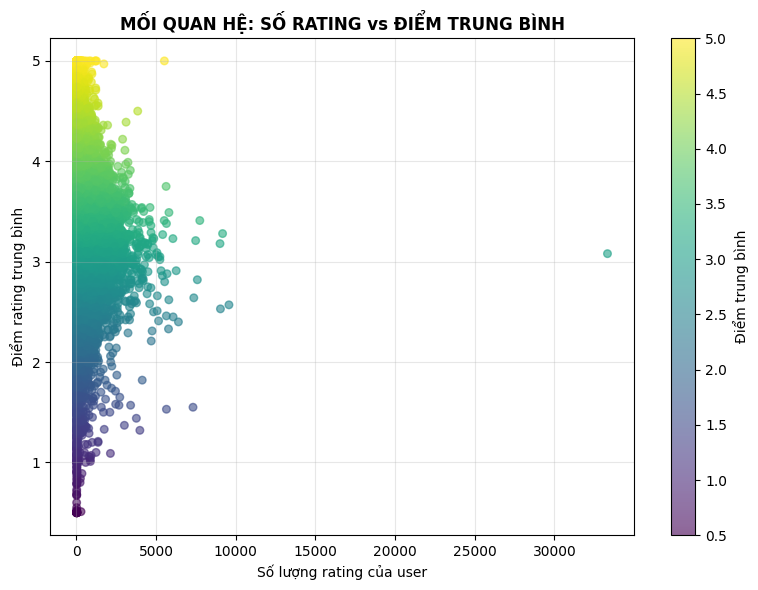

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

# Sửa lỗi font chữ
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# Giả sử df đã được load từ dữ liệu (ví dụ: pd.read_excel('data.xlsx'))
# Nếu chỉ có 1 user, scatter plot sẽ chỉ có 1 điểm; cần dataset lớn hơn để phân tích tương quan.

# Tính số rating và điểm trung bình cho mỗi user
user_stats = df.groupby('userId').agg({
    'rating': ['count', 'mean'],
    'movieId': 'nunique'
}).round(2)
user_stats.columns = ['rating_count', 'rating_mean', 'unique_movies']
user_stats = user_stats.reset_index()

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

# Scatter plot
scatter = ax1.scatter(user_stats['rating_count'], user_stats['rating_mean'],
                     c=user_stats['rating_mean'], cmap='viridis', alpha=0.6, s=30)
ax1.set_title('MỐI QUAN HỆ: SỐ RATING vs ĐIỂM TRUNG BÌNH', fontsize=12, fontweight='bold')
ax1.set_xlabel('Số lượng rating của user')
ax1.set_ylabel('Điểm rating trung bình')
ax1.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Điểm trung bình')

plt.tight_layout()
plt.show()

**Xu hướng chính:**

- Phân bố không đồng đều: Hầu hết phim có số rating thấp (dưới 10,000), tập trung ở điểm trung bình 3-4 sao.
  - Điều này cho thấy "hiệu ứng long-tail" phổ biến trong dữ liệu rating: Nhiều phim ít được xem/đánh giá (niche films) có điểm cao hơn, trong khi phim phổ biến (blockbusters) nhận nhiều rating hơn nhưng điểm trung bình thấp hơn do đa dạng ý kiến.


####**4.2.2.5.So sánh hành vi rating giữa các user**

**Câu hỏi: "Có sự khác biệt nào trong hành vi rating giữa các user không? User nào có xu hướng rating khắt khe/dễ dàng nhất?"**

**Mục tiêu:**

- Phân segment người dùng

- Tìm reviewer tiềm năng

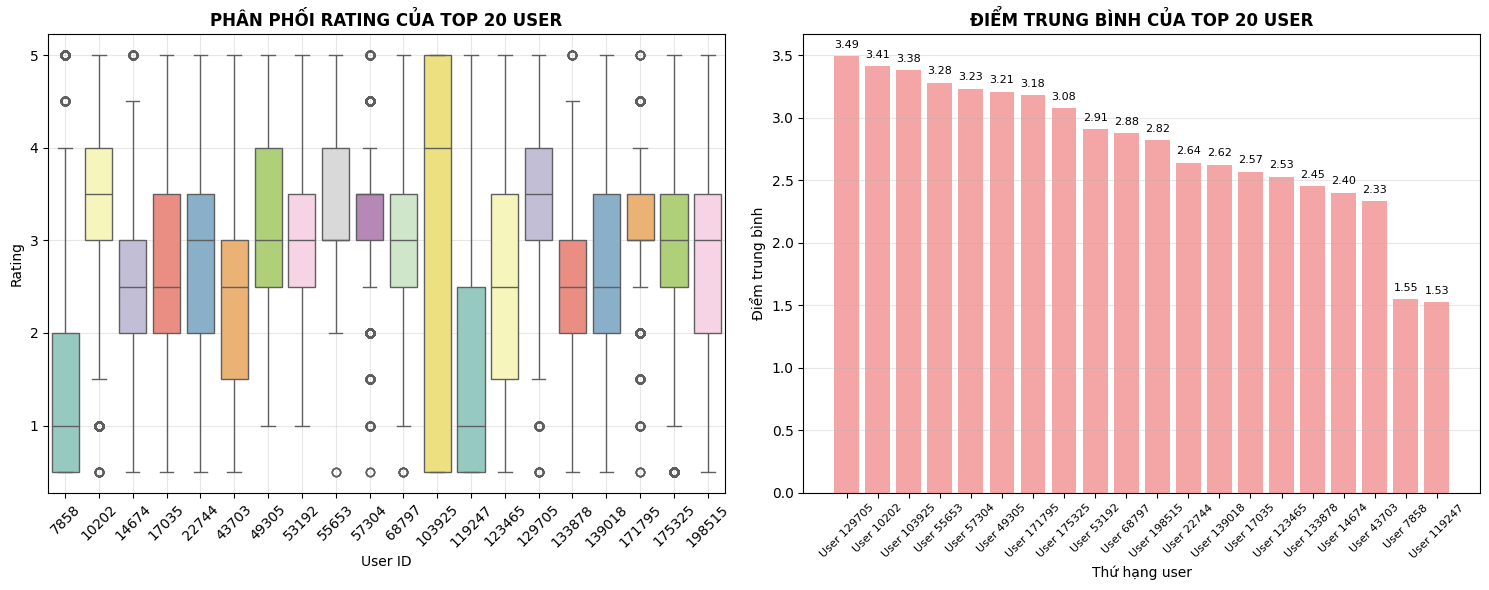

• User khắt khe nhất (điểm TB < 2.5): 5 user
• User dễ dàng nhất (điểm TB > 4.0): 0 user


In [ ]:

# Lấy top 20 user có nhiều rating nhất
top_20_users = df['userId'].value_counts().head(20).index
top_users_data = df[df['userId'].isin(top_20_users)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Box plot cho top users
sns.boxplot(data=top_users_data, x='userId', y='rating', ax=ax1, palette='Set3')
ax1.set_title('PHÂN PHỐI RATING CỦA TOP 20 USER', fontsize=12, fontweight='bold')
ax1.set_xlabel('User ID')
ax1.set_ylabel('Rating')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3)

# Bar chart điểm trung bình của top users
user_means = top_users_data.groupby('userId')['rating'].mean().sort_values(ascending=False)
bars = ax2.bar(range(len(user_means)), user_means.values, color='lightcoral', alpha=0.7)
ax2.set_title('ĐIỂM TRUNG BÌNH CỦA TOP 20 USER', fontsize=12, fontweight='bold')
ax2.set_xlabel('Thứ hạng user')
ax2.set_ylabel('Điểm trung bình')
ax2.set_xticks(range(len(user_means)))
ax2.set_xticklabels([f'User {uid}' for uid in user_means.index], rotation=45, fontsize=8)
ax2.grid(axis='y', alpha=0.3)

# Thêm giá trị trên các cột
for bar, value in zip(bars, user_means.values):
    ax2.text(bar.get_x() + bar.get_width()/2., value + 0.05, f'{value:.2f}',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Phân loại user
strict_users = user_means[user_means < 2.5]
lenient_users = user_means[user_means > 4.0]
print(f"• User khắt khe nhất (điểm TB < 2.5): {len(strict_users)} user")
print(f"• User dễ dàng nhất (điểm TB > 4.0): {len(lenient_users)} user")


**Xu hướng chính:**

- Giá trị trung bình: User đầu (1290, 1030) có điểm cao nhất cho thấy một số top users lại "harsh grader" – họ xem nhiều nhưng ít hài lòng.

- Xu hướng giảm dần: Từ ~3.5 xuống ~1.5, với độ lệch chuẩn cao (bars không đồng đều). Trung vị ~2.8-3.0, ngụ ý 50% top users đánh giá trên trung bình, 50% dưới.
Insight: Sự chênh lệch lớn (khoảng 2 sao giữa cao/thấp) nhấn mạnh tính cá nhân hóa: Không phải top user nào cũng "dễ tính". Trong hệ thống rating, điều này cảnh báo về cold-start problem (user mới có thể giống harsh users hơn).

####**4.2.2.6.Phân tích rating theo nhóm phim**

**Câu hỏi: "Có sự khác biệt về phân phối rating giữa các nhóm phim khác nhau không? Nhóm phim nào nhận được rating cao nhất?"**

**Mục tiêu:**

- Đánh giá chất lượng từng nhóm phim

- Tìm insights cho recommendation system

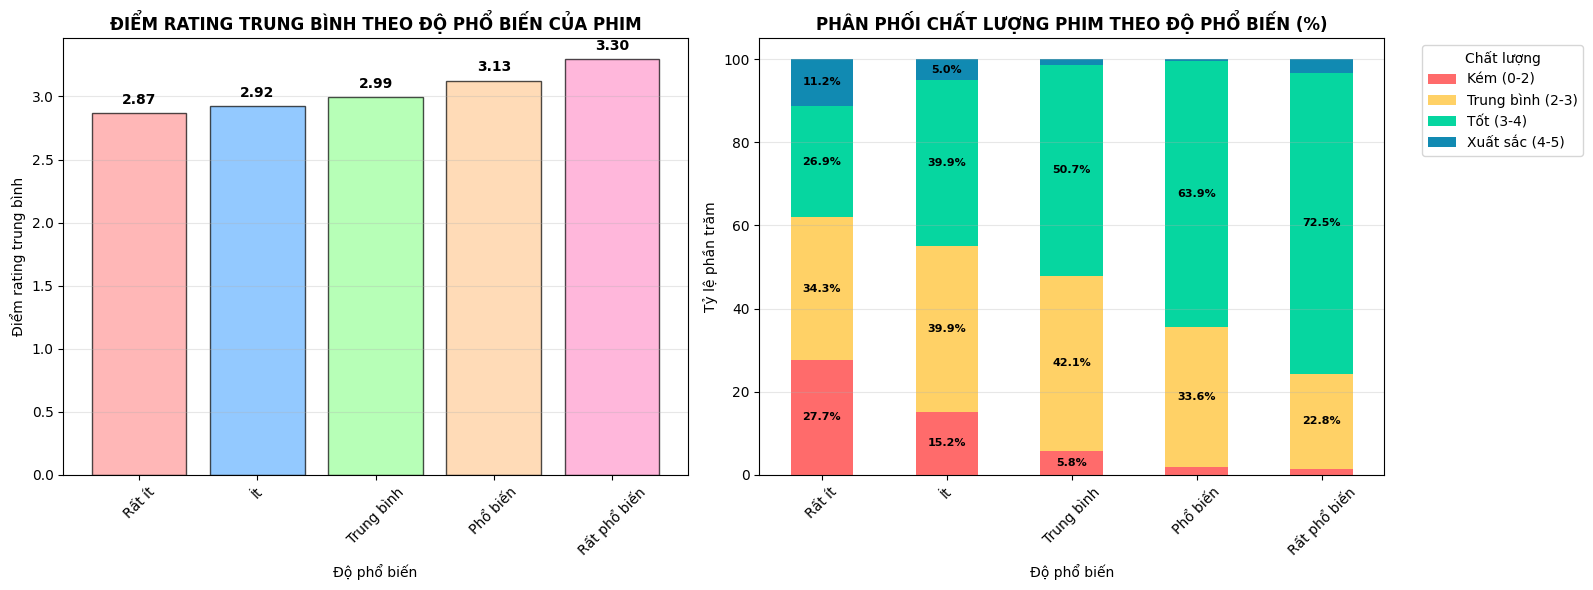

📊 THỐNG KÊ CHI TIẾT THEO ĐỘ PHỔ BIẾN:

🎬 RẤT ÍT:
   • Số phim: 18,607
   • Điểm trung bình: 2.87
   • Số rating trung bình: 1.0

🎬 ÍT:
   • Số phim: 25,420
   • Điểm trung bình: 2.92
   • Số rating trung bình: 3.0

🎬 TRUNG BÌNH:
   • Số phim: 17,547
   • Điểm trung bình: 2.99
   • Số rating trung bình: 10.7

🎬 PHỔ BIẾN:
   • Số phim: 10,713
   • Điểm trung bình: 3.13
   • Số rating trung bình: 45.9

🎬 RẤT PHỔ BIẾN:
   • Số phim: 12,145
   • Điểm trung bình: 3.30
   • Số rating trung bình: 2571.0

📈 XU HƯỚNG:
• Phim càng phổ biến thì điểm rating có xu hướng: CAO hơn
• Chênh lệch điểm: 0.43


In [ ]:
# Tính toán cho các movie
movie_stats = df.groupby('movieId').agg({
    'rating': ['count', 'mean', 'std'],
    'userId': 'nunique'
}).round(3)
movie_stats.columns = ['rating_count', 'rating_mean', 'rating_std', 'unique_users']
movie_stats = movie_stats.reset_index()

# Phân nhóm movie dựa trên số lượng rating
movie_stats['popularity'] = pd.cut(movie_stats['rating_count'],
                                  bins=[0, 1, 5, 20, 100, float('inf')],
                                  labels=['Rất ít', 'Ít', 'Trung bình', 'Phổ biến', 'Rất phổ biến'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ 1: Bar chart điểm trung bình theo độ phổ biến
popularity_means = movie_stats.groupby('popularity')['rating_mean'].mean().sort_index()
bars1 = ax1.bar(range(len(popularity_means)), popularity_means.values,
                color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'],
                alpha=0.7, edgecolor='black')

ax1.set_title('ĐIỂM RATING TRUNG BÌNH THEO ĐỘ PHỔ BIẾN CỦA PHIM', fontsize=12, fontweight='bold')
ax1.set_xlabel('Độ phổ biến')
ax1.set_ylabel('Điểm rating trung bình')
ax1.set_xticks(range(len(popularity_means)))
ax1.set_xticklabels(popularity_means.index, rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Thêm giá trị trên các cột
for bar, value in zip(bars1, popularity_means.values):
    ax1.text(bar.get_x() + bar.get_width()/2., value + 0.05, f'{value:.2f}',
             ha='center', va='bottom', fontweight='bold')

# Biểu đồ 2: Stacked bar chart phân phối rating theo nhóm phổ biến
popularity_rating = pd.crosstab(movie_stats['popularity'],
                               pd.cut(movie_stats['rating_mean'],
                                     bins=[0, 2, 3, 4, 5],
                                     labels=['Kém (0-2)', 'Trung bình (2-3)', 'Tốt (3-4)', 'Xuất sắc (4-5)']))
popularity_rating_percent = popularity_rating.div(popularity_rating.sum(axis=1), axis=0) * 100

popularity_rating_percent.plot(kind='bar', stacked=True, ax=ax2,
                              color=['#ff6b6b', '#ffd166', '#06d6a0', '#118ab2'])
ax2.set_title('PHÂN PHỐI CHẤT LƯỢNG PHIM THEO ĐỘ PHỔ BIẾN (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Độ phổ biến')
ax2.set_ylabel('Tỷ lệ phần trăm')
ax2.legend(title='Chất lượng', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(axis='y', alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Thêm tỷ lệ phần trăm trên biểu đồ stacked bar
for i, (idx, row) in enumerate(popularity_rating_percent.iterrows()):
    cumulative = 0
    for j, value in enumerate(row):
        if value > 5:  # Chỉ hiển thị nếu lớn hơn 5%
            ax2.text(i, cumulative + value/2, f'{value:.1f}%',
                    ha='center', va='center', fontweight='bold', fontsize=8)
        cumulative += value

plt.tight_layout()
plt.show()

# Thống kê chi tiết
print("📊 THỐNG KÊ CHI TIẾT THEO ĐỘ PHỔ BIẾN:")
print("=" * 50)
for popularity in ['Rất ít', 'Ít', 'Trung bình', 'Phổ biến', 'Rất phổ biến']:
    group_data = movie_stats[movie_stats['popularity'] == popularity]
    if len(group_data) > 0:
        print(f"\n🎬 {popularity.upper()}:")
        print(f"   • Số phim: {len(group_data):,}")
        print(f"   • Điểm trung bình: {group_data['rating_mean'].mean():.2f}")
        print(f"   • Số rating trung bình: {group_data['rating_count'].mean():.1f}")

# Phân tích xu hướng
print(f"\n📈 XU HƯỚNG:")
print(f"• Phim càng phổ biến thì điểm rating có xu hướng: {'CAO' if popularity_means.iloc[-1] > popularity_means.iloc[0] else 'THẤP'} hơn")
print(f"• Chênh lệch điểm: {popularity_means.iloc[-1] - popularity_means.iloc[0]:.2f}")

##**4.3.Kết Luận**


 **Kết luận các Insight Quan trọng từ Dữ liệu Ratings:**

1.  **Phân phối Rating:**
    *   Người dùng có xu hướng đánh giá khá tích cực, với gần 50% rating từ 4.0 sao trở lên.
    *   Điểm 4.0 sao là phổ biến nhất.
    *   Có sự chênh lệch rõ rệt giữa số lượng rating cao và thấp.
    *   **Insight:** Hệ thống có thể tận dụng xu hướng tích cực này để đề xuất các phim có điểm trung bình cao, nhưng cần cẩn trọng với các rating thấp để hiểu rõ lý do người dùng không hài lòng.

2.  **Phân bố Rating theo User:**
    *   Số lượng rating mỗi user có phân phối lệch, với đa số user chỉ rating một số ít phim.
    *   Có một số ít user rất tích cực, đóng góp số lượng rating lớn.
    *   Điểm rating trung bình của các user có sự khác biệt, với một số user có xu hướng đánh giá khắt khe hơn.
    *   **Insight:** Có thể phân loại user thành các nhóm (user tích cực, user bình thường, user khắt khe/dễ tính) để cá nhân hóa trải nghiệm hoặc tìm kiếm "reviewer" chất lượng cao.

3.  **Mối quan hệ giữa Số lượng Rating và Điểm Trung bình (Phân tích Movie):**
    *   Các phim có số lượng rating thấp thường có điểm trung bình phân tán rộng hơn.
    *   Các phim rất phổ biến (nhiều rating) có xu hướng có điểm trung bình thấp hơn so với các phim ít phổ biến hơn.
    *   **Insight:** Đây là "hiệu ứng long-tail" điển hình. Phim ít phổ biến có thể có điểm cao do được đánh giá bởi nhóm khán giả đặc thù, trong khi phim phổ biến nhận nhiều rating trái chiều hơn. Khi đề xuất, cần cân nhắc cả số lượng rating chứ không chỉ điểm trung bình.

4.  **Phân tích Rating theo Nhóm Phim (Độ phổ biến):**
    *   Phim "Rất phổ biến" có điểm trung bình cao hơn so với phim "Rất ít" phổ biến.
    *   Có sự khác biệt về phân phối chất lượng (rating trung bình) giữa các nhóm độ phổ biến.
    *   **Insight:** Độ phổ biến có ảnh hưởng đến điểm trung bình. Các bộ phim được xem nhiều có xu hướng nhận được đánh giá cao hơn một chút so với những bộ phim rất ít được đánh giá.

**Tóm lại:** Dữ liệu rating rất đa dạng về hành vi người dùng và đặc điểm phim. Việc hiểu rõ phân phối rating, sự khác biệt giữa các user và mối quan hệ giữa độ phổ biến và điểm rating là rất quan trọng để xây dựng một hệ thống đề xuất phim hiệu quả và cá nhân hóa.